# Task
Implement K-Nearest Neighbors (KNN) from scratch, including functions for Euclidean, Manhattan, Minkowski, Cosine, and Hamming distance metrics. Experiment with different K values and distance metrics, evaluate the model's performance using testing accuracy, confusion matrix, recall, and precision, visualize the results to show the impact of different distance metrics and K values on accuracy, and provide insights into the findings.

## Implement Distance Metrics

### Subtask:
Write Python functions from scratch for Euclidean, Manhattan, Minkowski, Cosine, and Hamming distances.


In [ ]:
import math
import numpy as np

def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")

    sum_sq_diff = 0
    for i in range(len(point1)):
        sum_sq_diff += (point1[i] - point2[i])**2
    return math.sqrt(sum_sq_diff)

def manhattan_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")

    sum_abs_diff = 0
    for i in range(len(point1)):
        sum_abs_diff += abs(point1[i] - point2[i])
    return sum_abs_diff

def minkowski_distance(point1, point2, p):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")
    if p < 1:
        raise ValueError("Order 'p' must be a positive integer.")

    sum_p_diff = 0
    for i in range(len(point1)):
        sum_p_diff += abs(point1[i] - point2[i])**p
    return sum_p_diff**(1/p)

def cosine_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")

    vec1 = np.array(point1)
    vec2 = np.array(point2)

    dot_product = np.dot(vec1, vec2);
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    if norm_vec1 == 0 or norm_vec2 == 0:
        return 1.0

    similarity = dot_product / (norm_vec1 * norm_vec2)
    return 1 - similarity

def hamming_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same length")

    distance = 0
    for i in range(len(point1)):
        if point1[i] != point2[i]:
            distance += 1
    return distance

print("Distance functions (euclidean_distance, manhattan_distance, minkowski_distance, cosine_distance, hamming_distance) defined successfully.")

Distance functions (euclidean_distance, manhattan_distance, minkowski_distance, cosine_distance, hamming_distance) defined successfully.


## Implement KNN Classifier

### Subtask:
Develop a K-Nearest Neighbors classifier from scratch, including functions for training (fitting) and prediction.


In [ ]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, n_neighbors=5, distance_metric=euclidean_distance):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        print("KNNClassifier fitted successfully. Training data and labels stored.")

    def _get_neighbors(self, X_test_point):
        distances = []
        for i, x_train_point in enumerate(self.X_train):
            dist = self.distance_metric(X_test_point, x_train_point)
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.n_neighbors]
        return neighbors

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for x_test_point in X_test:
            neighbors = self._get_neighbors(x_test_point)

            neighbor_labels = [label for dist, label in neighbors]

            if not neighbor_labels:
                predictions.append(None)
                continue

            most_common = Counter(neighbor_labels).most_common(1)
            predicted_label = most_common[0][0]
            predictions.append(predicted_label)

        print(f"Predictions generated for {len(X_test)} test points.")
        return predictions

print("KNNClassifier class defined successfully.")

KNNClassifier class defined successfully.


## Experiment and Evaluate

### Subtask:
Iterate through different values of K and each implemented distance metric, train the KNN model, and evaluate its testing accuracy.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=42)
print("Synthetic dataset generated: X shape", X.shape, "y shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
print("K values defined:", k_values)

distance_metrics = {
    'Euclidean': euclidean_distance,
    'Manhattan': manhattan_distance,
    'Minkowski (p=3)': lambda p1, p2: minkowski_distance(p1, p2, p=3),
    'Cosine': cosine_distance,
    'Hamming': hamming_distance
}
print("Distance metrics defined:", list(distance_metrics.keys()))

results = []

print("Starting KNN model training and evaluation...")
for metric_name, metric_func in distance_metrics.items():
    for k in k_values:
        knn_model = KNNClassifier(n_neighbors=k, distance_metric=metric_func)

        knn_model.fit(X_train, y_train)

        y_pred = knn_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'Distance Metric': metric_name,
            'K': k,
            'Accuracy': accuracy
        })
        print(f"  Evaluated: Metric={metric_name}, K={k}, Accuracy={accuracy:.4f}")

results_df = pd.DataFrame(results)
print("\n--- Experiment Results ---")
print(results_df.to_string())

Synthetic dataset generated: X shape (1000, 10) y shape (1000,)
Dataset split into training and testing sets.
X_train shape: (700, 10), y_train shape: (700,)
X_test shape: (300, 10), y_test shape: (300,)
K values defined: [1, 3, 5, 7, 9, 11, 13, 15]
Distance metrics defined: ['Euclidean', 'Manhattan', 'Minkowski (p=3)', 'Cosine', 'Hamming']
Starting KNN model training and evaluation...
KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.
  Evaluated: Metric=Euclidean, K=1, Accuracy=0.9300
KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.
  Evaluated: Metric=Euclidean, K=3, Accuracy=0.9533
KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.
  Evaluated: Metric=Euclidean, K=5, Accuracy=0.9500
KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.
  Evaluated

## Identify Best Model and Metrics

### Subtask:
Determine the optimal K value and distance metric based on the highest testing accuracy.


In [ ]:
best_result = results_df.loc[results_df['Accuracy'].idxmax()]

optimal_k = int(best_result['K'])
best_metric = best_result['Distance Metric']
highest_accuracy = best_result['Accuracy']

print(f"Optimal K value: {optimal_k}")
print(f"Best Distance Metric: {best_metric}")
print(f"Highest Testing Accuracy: {highest_accuracy:.4f}")

Optimal K value: 3
Best Distance Metric: Euclidean
Highest Testing Accuracy: 0.9533


## Calculate Detailed Performance

### Subtask:
For the best performing model, calculate and print the confusion matrix, recall, and precision.


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

best_knn_model = KNNClassifier(n_neighbors=optimal_k, distance_metric=distance_metrics[best_metric])

best_knn_model.fit(X_train, y_train)

y_pred_best = best_knn_model.predict(X_test);

conf_matrix = confusion_matrix(y_test, y_pred_best)

recall = recall_score(y_test, y_pred_best)

precision = precision_score(y_test, y_pred_best)

print(f"\n--- Detailed Performance for Best Model (K={optimal_k}, Metric={best_metric}) ---")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Recall Score: {recall:.4f}")
print(f"Precision Score: {precision:.4f}")

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.

--- Detailed Performance for Best Model (K=3, Metric=Euclidean) ---
Confusion Matrix:
[[140   4]
 [ 10 146]]
Recall Score: 0.9359
Precision Score: 0.9733


## Visualize Results

### Subtask:
Create plots to visualize how different distance metrics affect accuracy across varying K values.


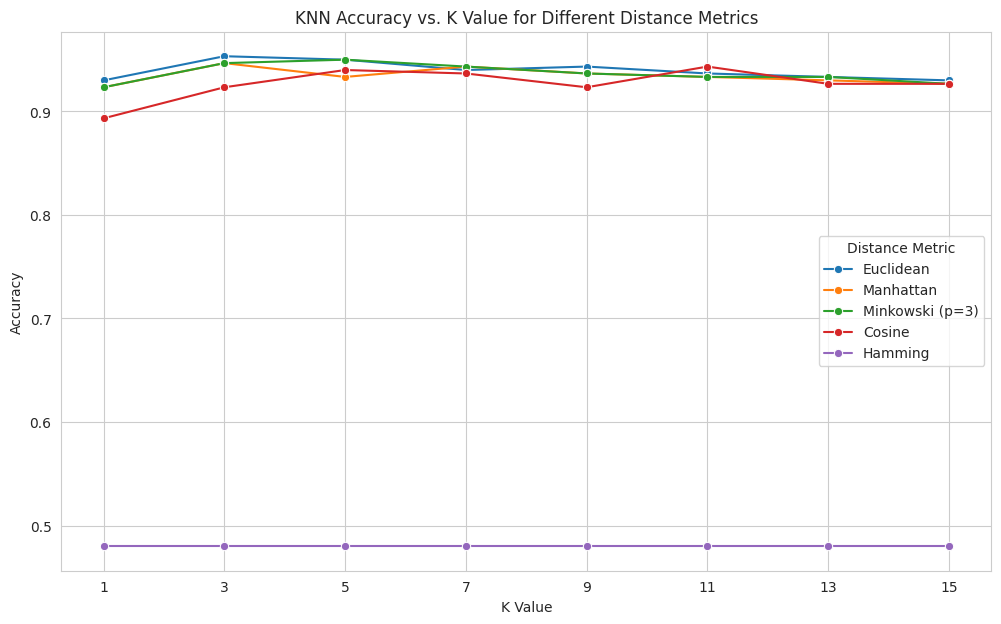

Plot of KNN accuracy for different K values and distance metrics generated successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.lineplot(data=results_df, x='K', y='Accuracy', hue='Distance Metric', marker='o')

plt.title('KNN Accuracy vs. K Value for Different Distance Metrics')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

plt.legend(title='Distance Metric')

plt.xticks(k_values)

plt.show()

print("Plot of KNN accuracy for different K values and distance metrics generated successfully.")

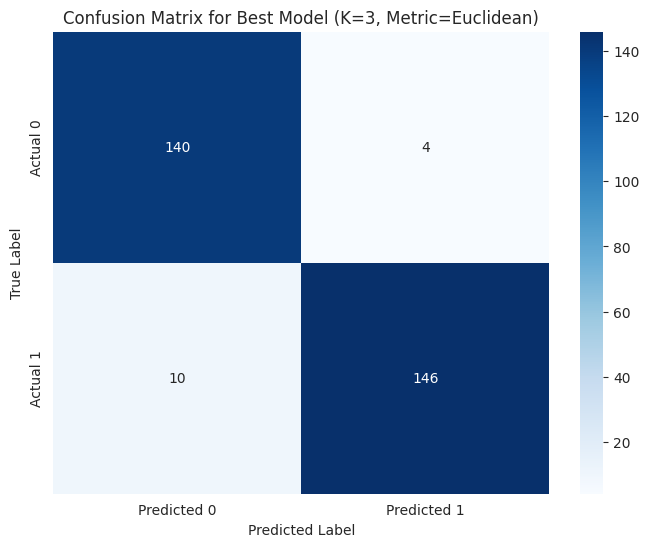

Confusion Matrix plot generated successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for Best Model (K={optimal_k}, Metric={best_metric})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix plot generated successfully.")

# Task
Iterate through all the entries in the `results_df` dataframe, and for each combination of 'Distance Metric' and 'K' value, create a `KNNClassifier` with the corresponding parameters. Then, fit each classifier on `X_train` and `y_train`, make predictions on `X_test`, calculate the confusion matrix using `sklearn.metrics.confusion_matrix`, and visualize each confusion matrix using `seaborn.heatmap`, with titles indicating the K value and distance metric. Finally, summarize the findings from the multiple confusion matrices, highlighting differences or patterns observed across different K values and distance metrics, and discuss the overall performance of the KNN models.

## Iterate and Plot Confusion Matrices

### Subtask:
Loop through all the entries in the `results_df`. For each combination of 'Distance Metric' and 'K' value, re-instantiate the `KNNClassifier` with the corresponding parameters. Fit the model on `X_train` and `y_train`, make predictions on `X_test`, calculate the confusion matrix using `confusion_matrix` from `sklearn.metrics`, and then visualize each confusion matrix using `seaborn.heatmap`. Each plot will have a title indicating the K value and distance metric used.


**Reasoning**:
The subtask requires iterating through all the entries in `results_df` to re-evaluate the KNN model for each combination of K and distance metric, calculate their confusion matrices, and then visualize each one using a heatmap. This step systematically creates and plots all confusion matrices.



Generating confusion matrices for all K values and distance metrics...
KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


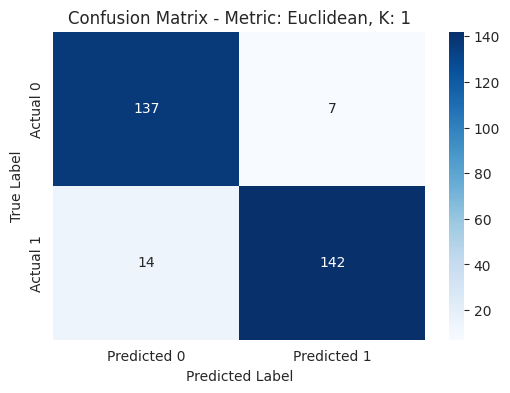

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


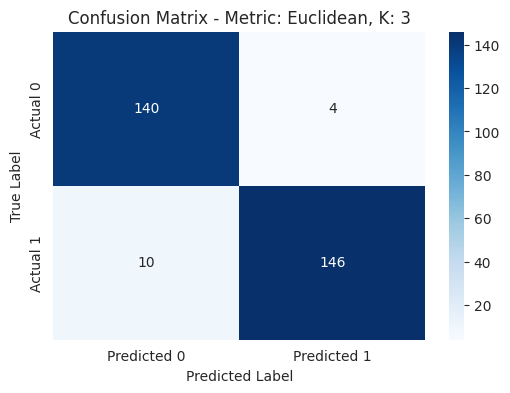

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


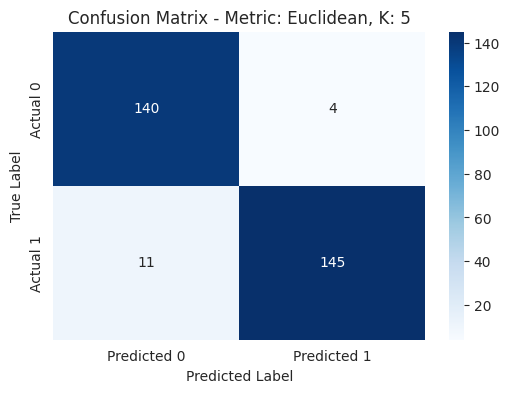

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


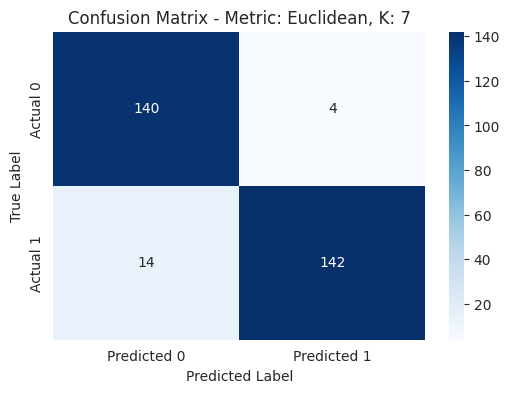

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


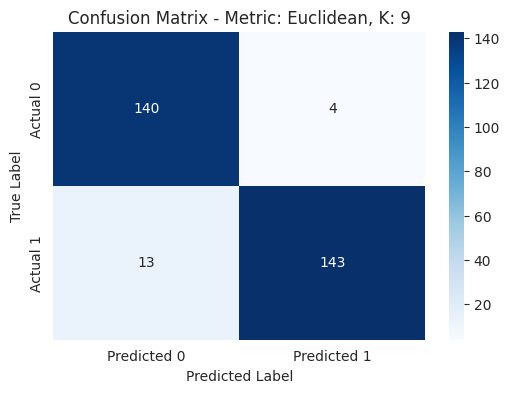

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


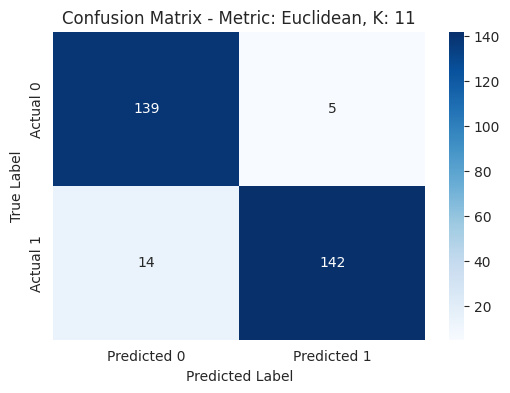

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


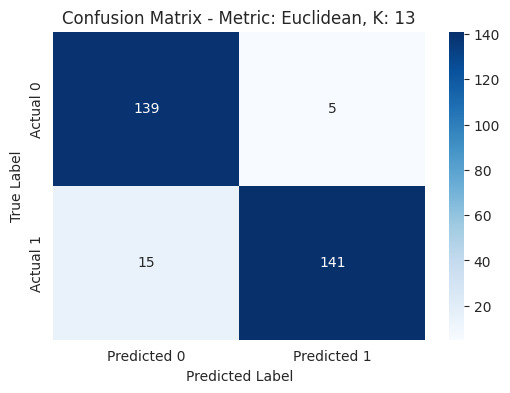

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


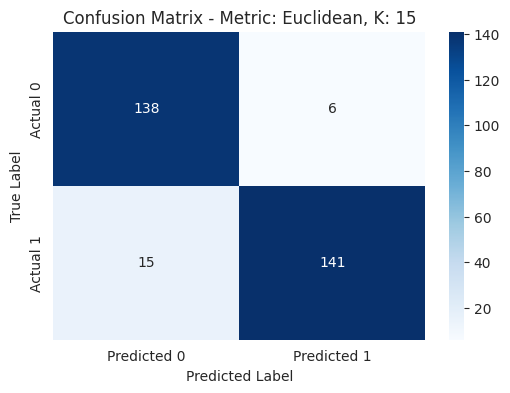

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


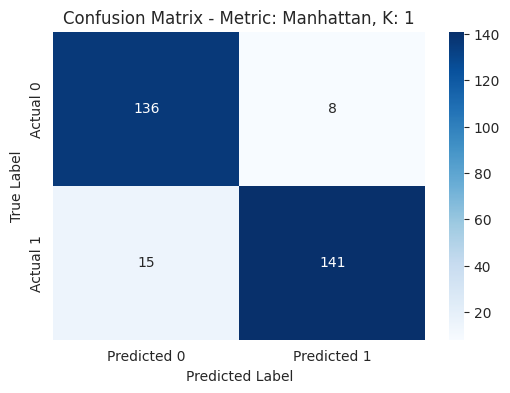

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


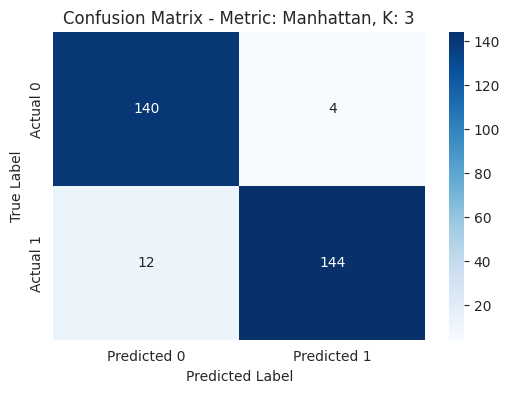

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


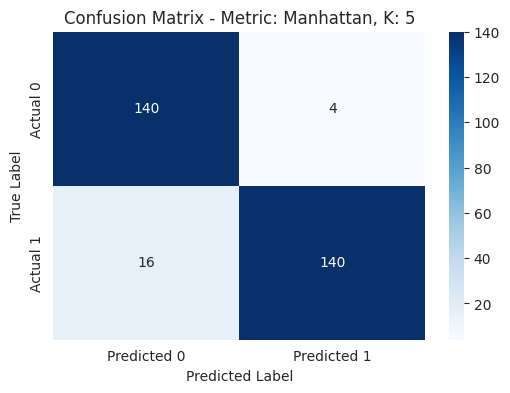

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


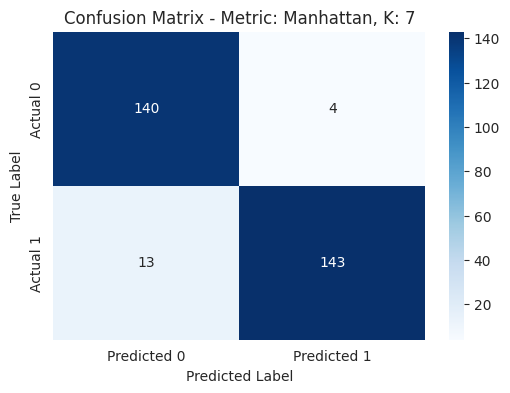

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


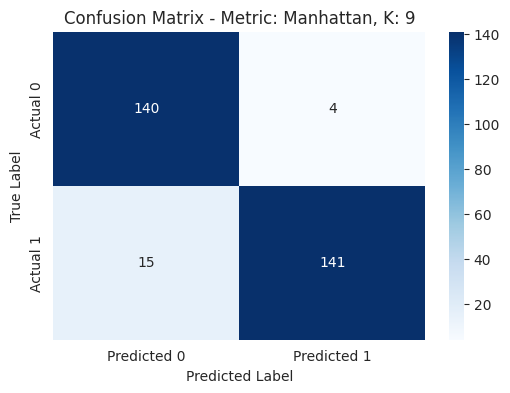

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


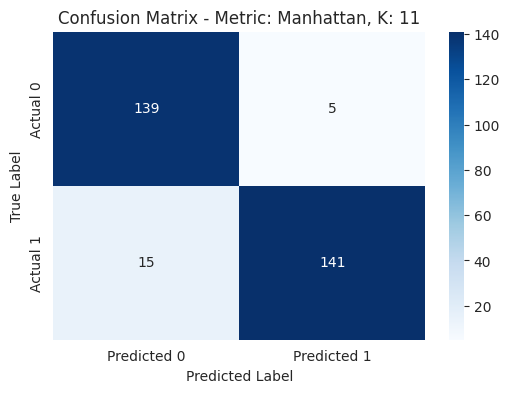

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


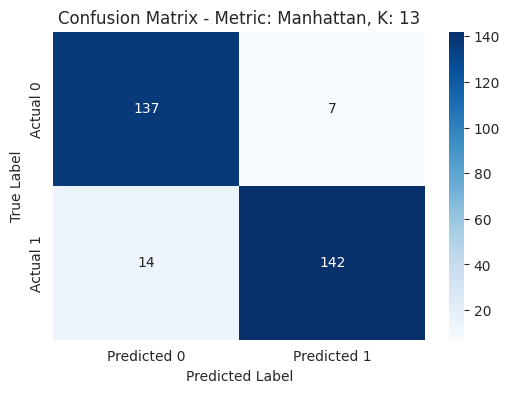

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


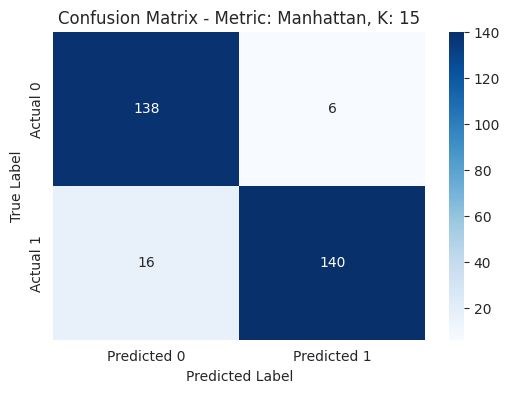

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


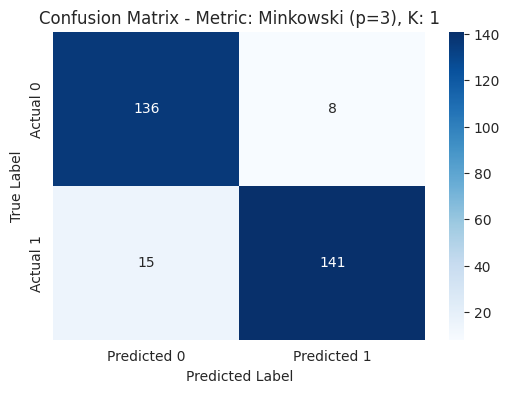

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


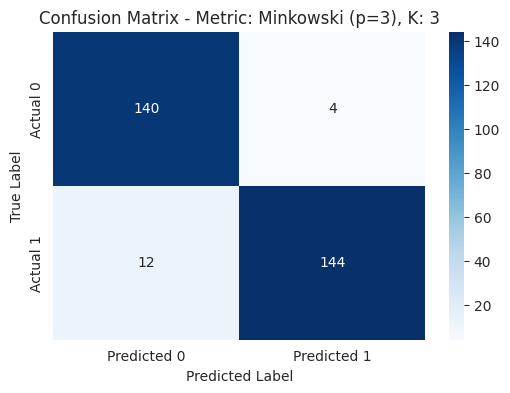

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


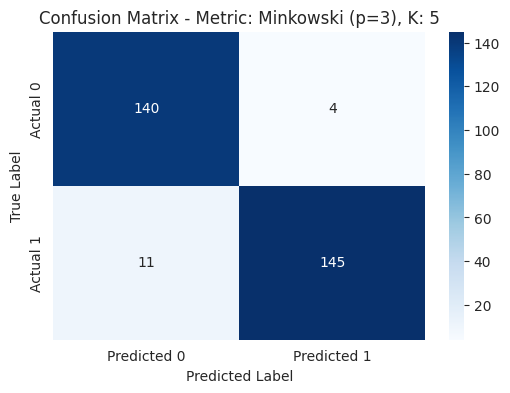

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


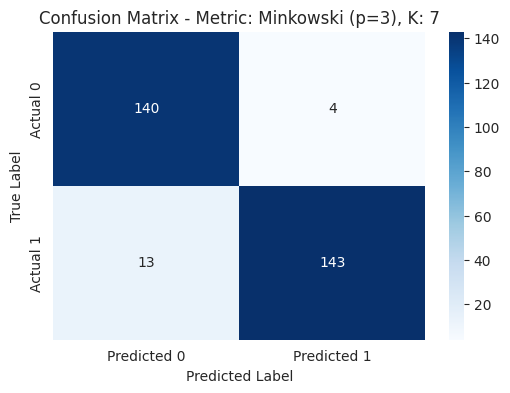

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


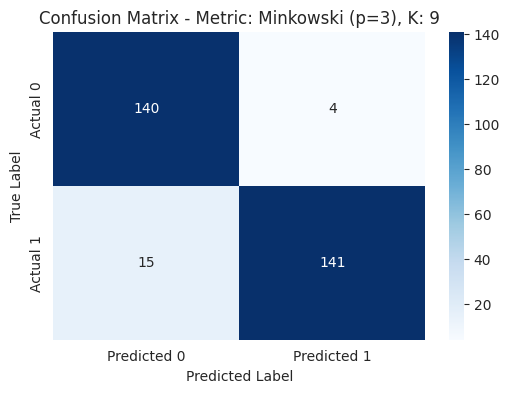

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


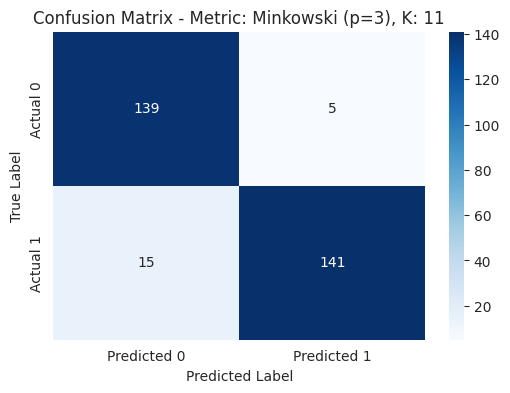

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


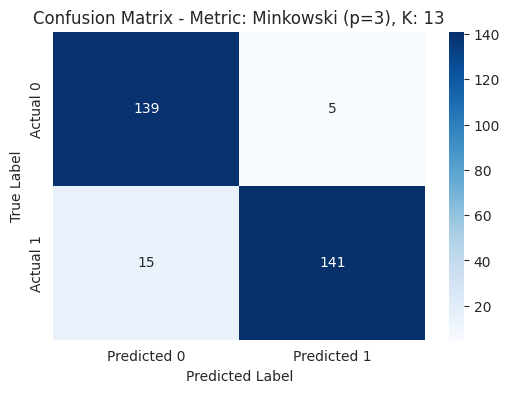

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


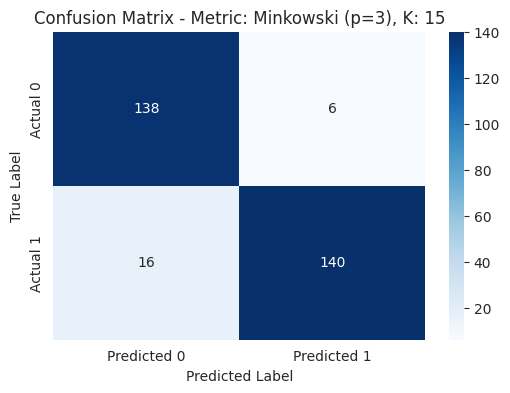

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


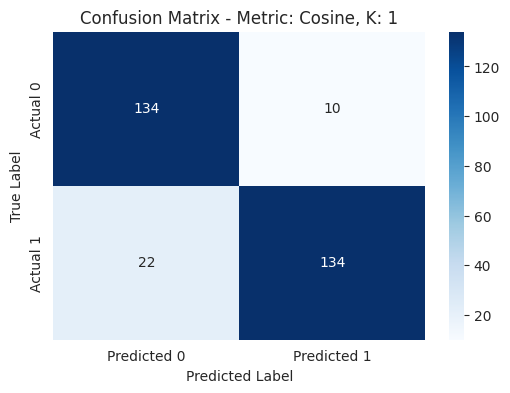

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


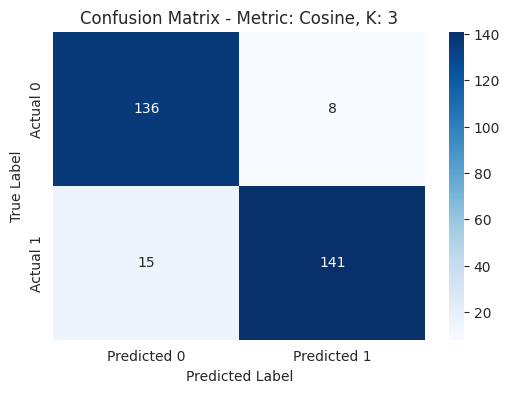

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


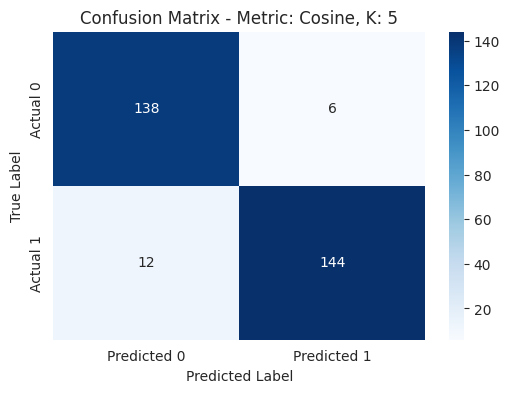

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


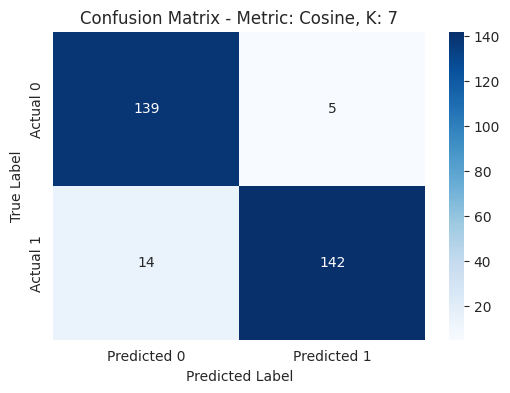

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


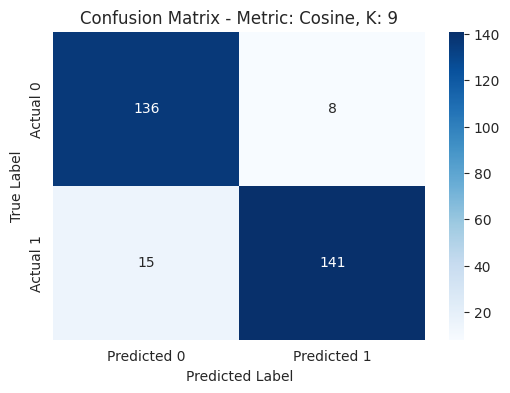

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


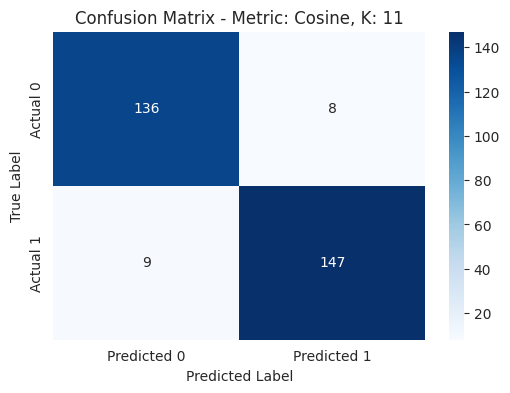

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


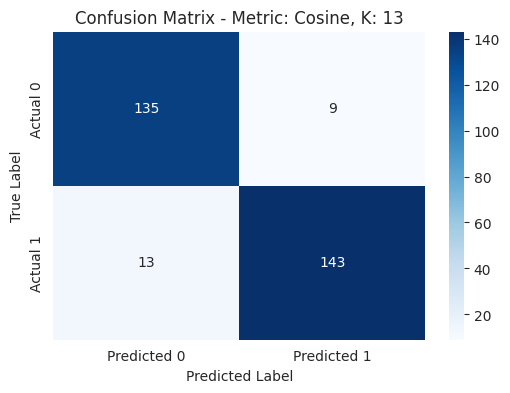

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


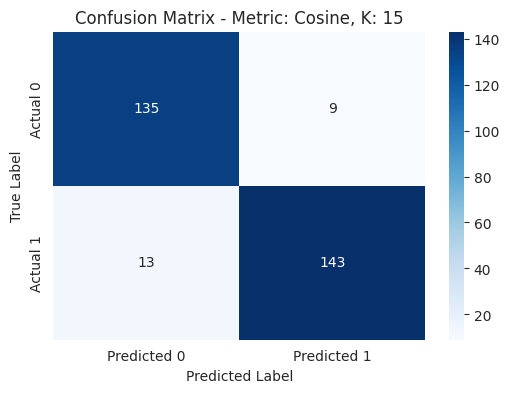

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


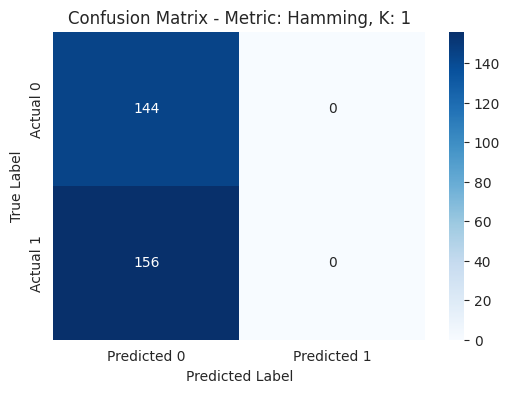

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


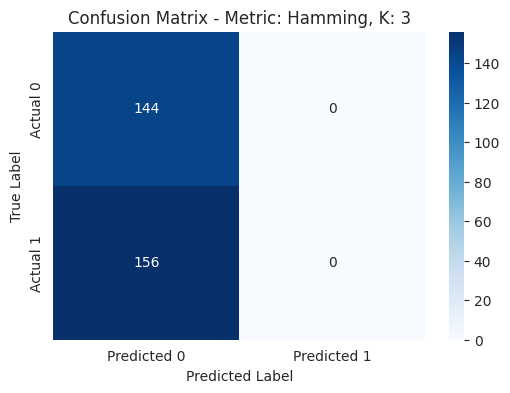

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


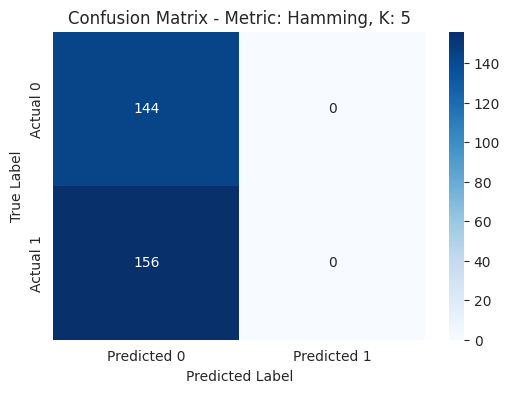

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


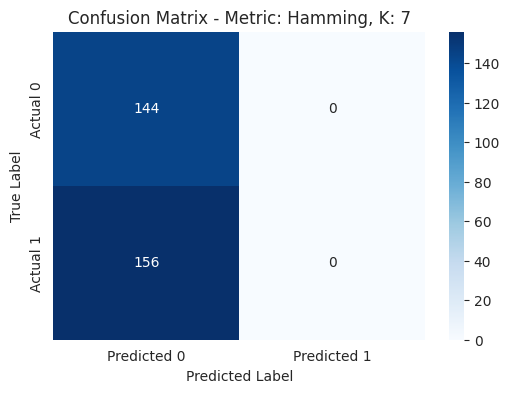

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


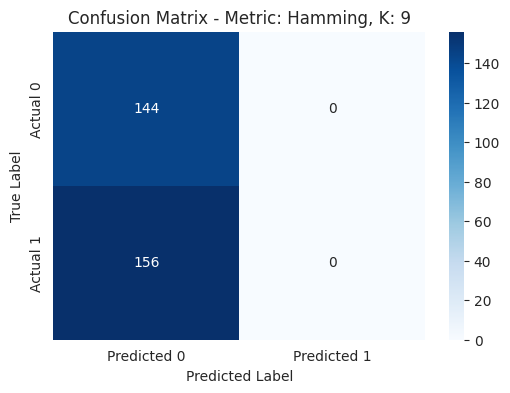

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


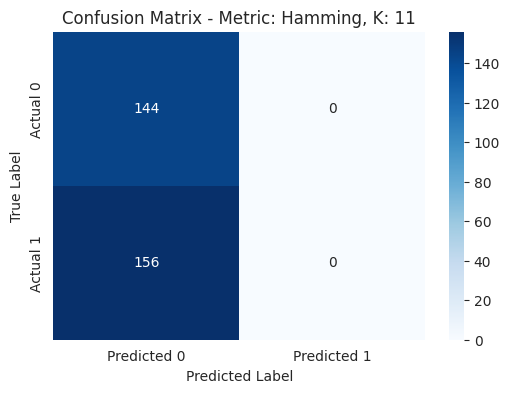

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


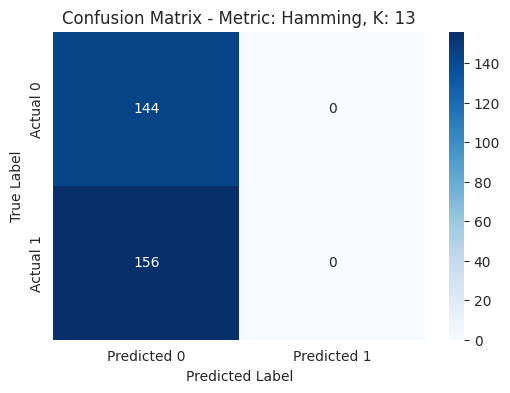

KNNClassifier fitted successfully. Training data and labels stored.
Predictions generated for 300 test points.


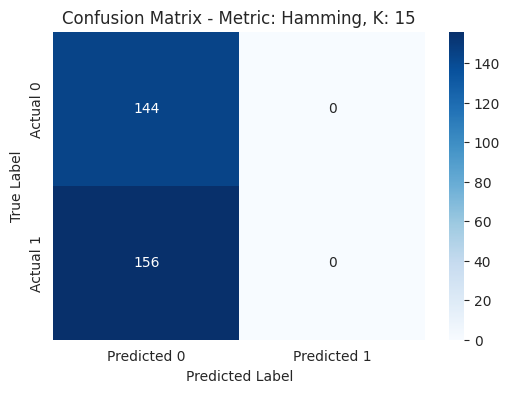

All confusion matrix plots generated successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Generating confusion matrices for all K values and distance metrics...")

for index, row in results_df.iterrows():
    metric_name = row['Distance Metric']
    k_value = int(row['K'])

    if metric_name == 'Minkowski (p=3)':
        metric_func = lambda p1, p2: minkowski_distance(p1, p2, p=3)
    else:
        metric_func = globals()[metric_name.split(' ')[0].lower() + '_distance']

    knn_model = KNNClassifier(n_neighbors=k_value, distance_metric=metric_func)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    conf_matrix_current = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_current, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - Metric: {metric_name}, K: {k_value}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("All confusion matrix plots generated successfully.")